In [145]:
import os

import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [186]:
train=pd.read_csv(r"G:\LearnBay Machine Learning\Logistic Regression(2)\Digit_Recognizer_train.csv")
test=pd.read_csv(r"C:\Users\Anand Sagar\Desktop\LOGISTIC_REGRESSION\Digit_Recognizer_test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# check duplicate
train.duplicated().sum()

0

In [148]:
test.duplicated().sum()

0

In [149]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
print(train.shape,test.shape)

(42000, 785) (28000, 784)


In [151]:
train['data']='train'
test['data']='test'
# for understanding purpose

In [152]:
all_data=pd.concat([train,test],axis=0)

In [153]:
all_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,data
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train


In [154]:
all_data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,data
27995,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
27996,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
27997,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
27998,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
27999,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test


# DATA PREPROCESSING

**Handling missing value**

In [155]:
all_data.isnull().sum()

label       28000
pixel0          0
pixel1          0
pixel2          0
pixel3          0
            ...  
pixel780        0
pixel781        0
pixel782        0
pixel783        0
data            0
Length: 786, dtype: int64

In [156]:
# No missing value

**Outlier Treatment**

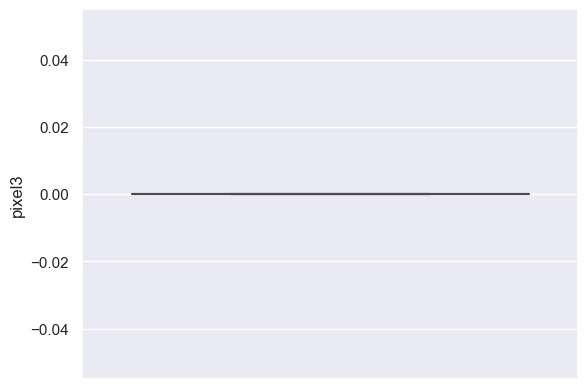

In [157]:
sns.boxplot(y='pixel3',data=all_data)
plt.show()

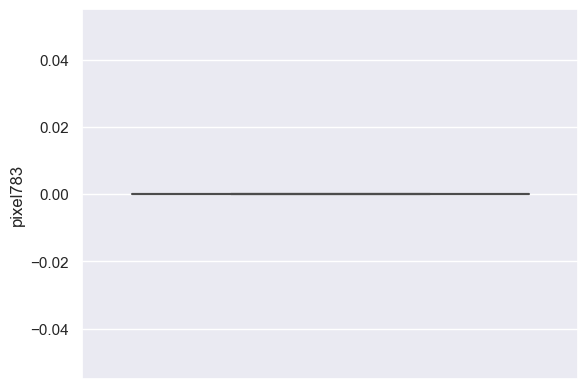

In [158]:
sns.boxplot(y='pixel783',data=all_data)
plt.show()

In [159]:
# Outlier is not there 

**Encoding Method**

In [160]:
all_data.info()
# no any object type column except data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 27999
Columns: 786 entries, label to data
dtypes: float64(1), int64(784), object(1)
memory usage: 420.3+ MB


In [161]:
all_data=all_data.drop(['data'],axis=1)

# IMBALANCE DATA

In [162]:
all_data['label'].value_counts()
# data is allready  balanced

1.0    4684
7.0    4401
3.0    4351
9.0    4188
2.0    4177
6.0    4137
0.0    4132
4.0    4072
8.0    4063
5.0    3795
Name: label, dtype: int64

# FEATURE SCALING

In [163]:
all_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [164]:
# split the data into independent and dependent variable
x=train.drop(['label','data'],axis=1)
y=train[['label']]

In [165]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
y.head()

,label
0,1
1,0
2,1
3,4
4,0


In [167]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

**Split the data into train and test**

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=101,stratify=y)

In [169]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,data
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test


In [170]:
test=test.drop(['data'],axis=1)

In [171]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
y.value_counts()

label
1        4684
7        4401
3        4351
9        4188
2        4177
6        4137
0        4132
4        4072
8        4063
5        3795
dtype: int64

# Building Logistic Regression with Multiple Class

**Approach 1 : OVR OR OVA**

In [173]:
from sklearn.linear_model import LinearRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [174]:
# Multi_class :{'auto','ovr','multinomial'}
logit_ovr=LogisticRegression(multi_class='ovr')
logit_ovr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

LogisticRegression(multi_class='ovr')

In [175]:
# predict
y_pred_ovr_train=logit_ovr.predict(x_train)
y_pred_ovr_test=logit_ovr.predict(x_test)

In [176]:
# evaluate the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [177]:
print(confusion_matrix(y_train,y_pred_ovr_train))
print("****************"*5)
print(confusion_matrix(y_test,y_pred_ovr_test))

[[2863    0    1    1    5    5    8    0    9    0]
 [   0 3241    7    6    1    5    3    1   14    1]
 [  13   10 2713   36   27   11   16   31   60    7]
 [   4    6   58 2816    3   58    6   17   52   26]
 [   2   11   12    3 2711    3    8    8   19   73]
 [  11    5   21   71   23 2409   39    5   48   24]
 [  12    2   11    0    8   35 2813    0   14    1]
 [   5    6   29    2   20    2    2 2931    8   76]
 [  12   43   19   65   22   67   18   13 2545   40]
 [   8    6    6   46   64   24    0   73   28 2677]]
********************************************************************************
[[1188    0    6    4    2   15   10    1   11    3]
 [   1 1356    6    6    0    6    2    6   19    3]
 [   9   21 1090   21   15    9   19   33   30    6]
 [   6    4   46 1127    3   44    6   17   30   22]
 [   1    3    9    6 1137    3    9    7   12   35]
 [  19    8    9   37   14  982   14    8   36   12]
 [  15    1   15    0   13   14 1173    1    8    1]
 [   3    7   10 

In [178]:
print(classification_report(y_train,y_pred_ovr_train))
print("*************"*5)
print(classification_report(y_test,y_pred_ovr_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2892
           1       0.97      0.99      0.98      3279
           2       0.94      0.93      0.94      2924
           3       0.92      0.92      0.92      3046
           4       0.94      0.95      0.95      2850
           5       0.92      0.91      0.91      2656
           6       0.97      0.97      0.97      2896
           7       0.95      0.95      0.95      3081
           8       0.91      0.89      0.90      2844
           9       0.92      0.91      0.91      2932

    accuracy                           0.94     29400
   macro avg       0.94      0.94      0.94     29400
weighted avg       0.94      0.94      0.94     29400

*****************************************************************
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1240
           1       0.95      0.97      0.96      1405
           2

In [179]:
print(accuracy_score(y_train,y_pred_ovr_train))
print("*************"*5)
print(accuracy_score(y_test,y_pred_ovr_test))

0.9428231292517006
*****************************************************************
0.9085714285714286


# Cross Validation

In [180]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_ovr, x_train, y_train, cv=10)
test_accuracy = cross_val_score(logit_ovr, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

Train Accuracy [0.90680272 0.90782313 0.90986395 0.9122449  0.89795918 0.91870748
 0.90544218 0.91258503 0.90306122 0.90136054]

Train Mean Accuracy 0.9075850340136054

Train Max Accuracy 0.9187074829931973

Test Accuracy [0.90238095 0.88968254 0.89206349 0.88650794 0.87539683 0.91269841
 0.88253968 0.87777778 0.88253968 0.89444444]

Test Mean Accuracy 0.8896031746031745

Test Max Accuracy 0.9126984126984127


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Approach 2 - Multinomial**

In [181]:
# multi_class : {'auto','ovr','multinomial'}
logit_multi=LogisticRegression(multi_class='multinomial')
logit_multi.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [182]:
# Predict
y_pred_multi_train=logit_multi.predict(x_train)
y_pred_multi_test=logit_multi.predict(x_test)

In [183]:
# evaluate the model
print(confusion_matrix(y_train,y_pred_multi_train))
print()
print(confusion_matrix(y_test,y_pred_multi_test))

[[2874    0    2    2    3    5    1    0    5    0]
 [   0 3242    3    6    1    3    2    3   15    4]
 [   5    8 2772   36   20    8   13   18   40    4]
 [   1    3   48 2850    1   64    3    9   46   21]
 [   1   10   14    3 2736    1   13    1   11   60]
 [  10    5   16   52   15 2479   19    4   47    9]
 [   8    1    4    0    7   21 2842    0   11    2]
 [   1    5   17    4   11    1    1 2977    8   56]
 [   7   34   20   55   11   48   10    6 2636   17]
 [   4    7    4   18   36   12    0   60   18 2773]]

[[1178    0    7    3    4   17   16    2   11    2]
 [   1 1355    5    9    0    4    2    6   20    3]
 [   6   28 1080   28   13   14   20   25   31    8]
 [   6    8   44 1124    3   51    4   20   25   20]
 [   2    4    7    3 1127    3   13    9    8   46]
 [  16   11   10   40   16  969   22    6   36   13]
 [  12    2   19    2   14   13 1170    1    8    0]
 [   3    7   10   11   12    5    1 1216    5   50]
 [  15   21   17   40    4   39   10    3 10

In [184]:
print(classification_report(y_train,y_pred_multi_train))
print()
print(classification_report(y_test,y_pred_multi_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2892
           1       0.98      0.99      0.98      3279
           2       0.96      0.95      0.95      2924
           3       0.94      0.94      0.94      3046
           4       0.96      0.96      0.96      2850
           5       0.94      0.93      0.94      2656
           6       0.98      0.98      0.98      2896
           7       0.97      0.97      0.97      3081
           8       0.93      0.93      0.93      2844
           9       0.94      0.95      0.94      2932

    accuracy                           0.96     29400
   macro avg       0.96      0.96      0.96     29400
weighted avg       0.96      0.96      0.96     29400


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1240
           1       0.94      0.96      0.95      1405
           2       0.90      0.86      0.88      1253
           3       0.88

In [185]:
print(accuracy_score(y_train,y_pred_multi_train))
print()
print(accuracy_score(y_test,y_pred_multi_test))

0.9585374149659864

0.9026984126984127
